<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%2025/One_Class_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Class SVM for anamoly detection

**References**:
- [Anomaly Detection in Python — Part 2; Multivariate Unsupervised Methods and Code](https://towardsdatascience.com/anomaly-detection-in-python-part-2-multivariate-unsupervised-methods-and-code-b311a63f298b)

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from matplotlib import pyplot as plt

## Creating sample data

In [2]:
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)
d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

all_data = pd.DataFrame(np.concatenate([d1, d2], axis = 0), columns = ['Var 1', 'Var 2'])

## Detecting outliers and decision boundary

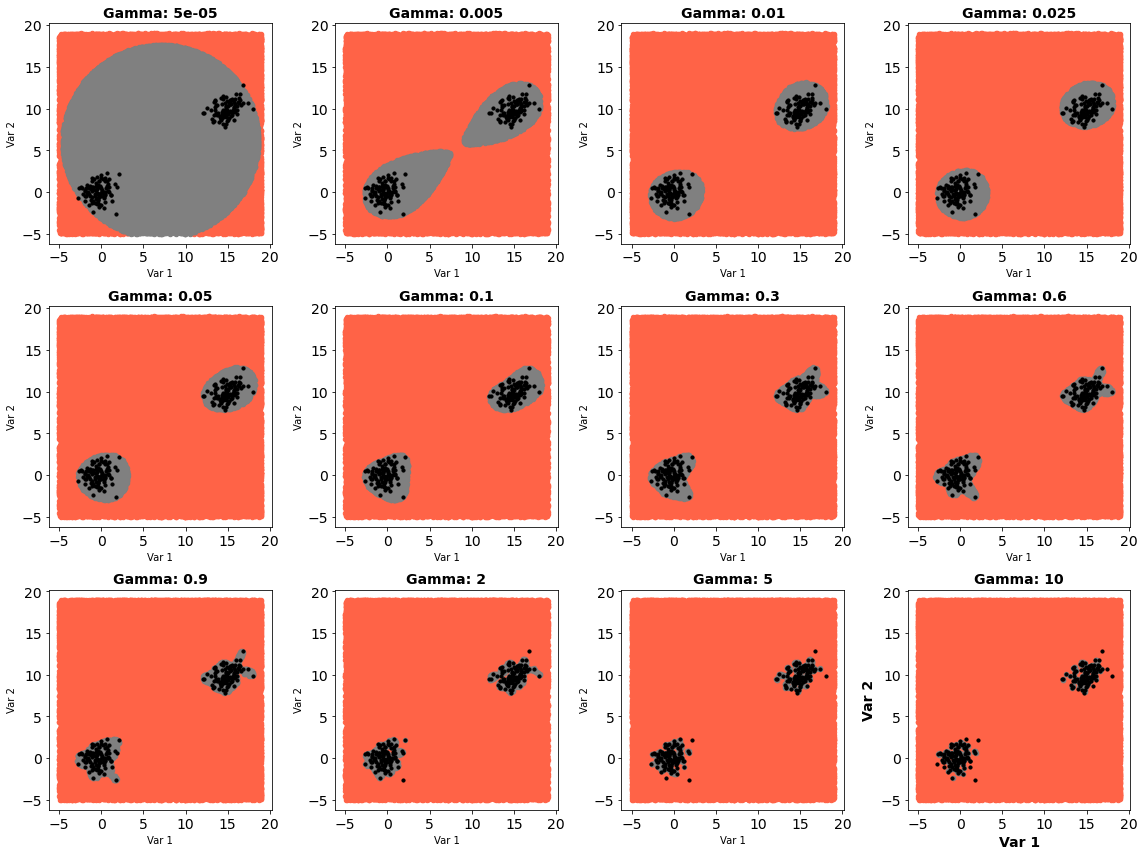

In [3]:
def plot_anomaly2(data, predicted, ax):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]
    
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    anomalies.plot.scatter(column1, column2, color = 'tomato', fontsize = 14,  sharex = False, ax = ax)
    normal.plot.scatter(column1, column2, color = 'grey', fontsize = 14,  sharex = False, ax = ax)
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax


x_fake  =  pd.DataFrame(np.random.uniform(-5, 19, (50_000, 2)), columns = ['Var 1', 'Var 2'])
gammas = [.00005, .005, .01, .025, .05, .1,.3, .6, .9, 2, 5, 10]

fig, axes = plt.subplots(3, 4, figsize = (16, 12), tight_layout = True)

for i, ax in zip(range(len(gammas)), axes.flatten()):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel = 'rbf', degree = 5, gamma = gamma, coef0 = 0.0, tol = 0.001, nu = 0.01, 
                        shrinking = True, cache_size = 200, verbose = False, max_iter = - 1).fit(all_data)
    model_predictions = model.predict(x_fake)
    ax = plot_anomaly2(x_fake, model_predictions,ax)
    ax.scatter(all_data.iloc[:, 0], all_data.iloc[:, 1], color = 'k', s = 10)
    ax.set_title('Gamma: {}'.format(np.around(gamma,6)), weight = 'bold', fontsize = 14)